In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<Axes: >, <matplotlib.image.AxesImage at 0x1f858d62d50>)

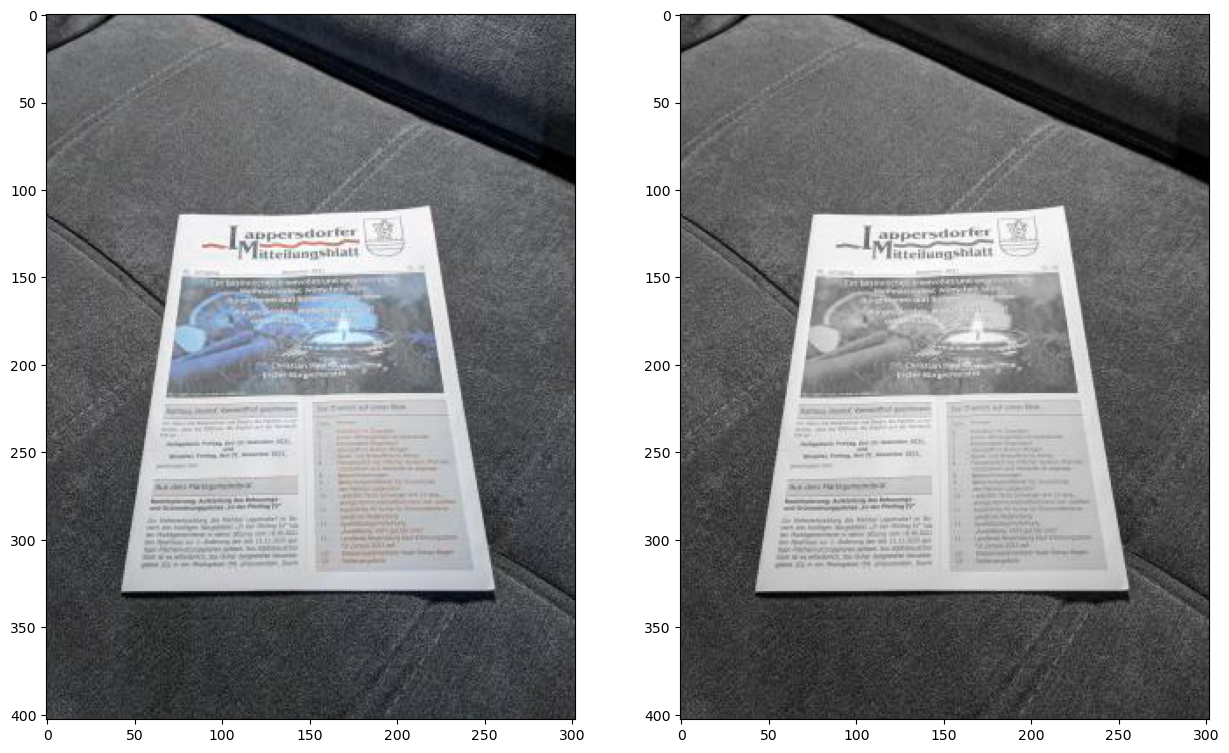

In [12]:
img = cv2.imread('document.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In [13]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(<Axes: >, <matplotlib.image.AxesImage at 0x1f858392350>)

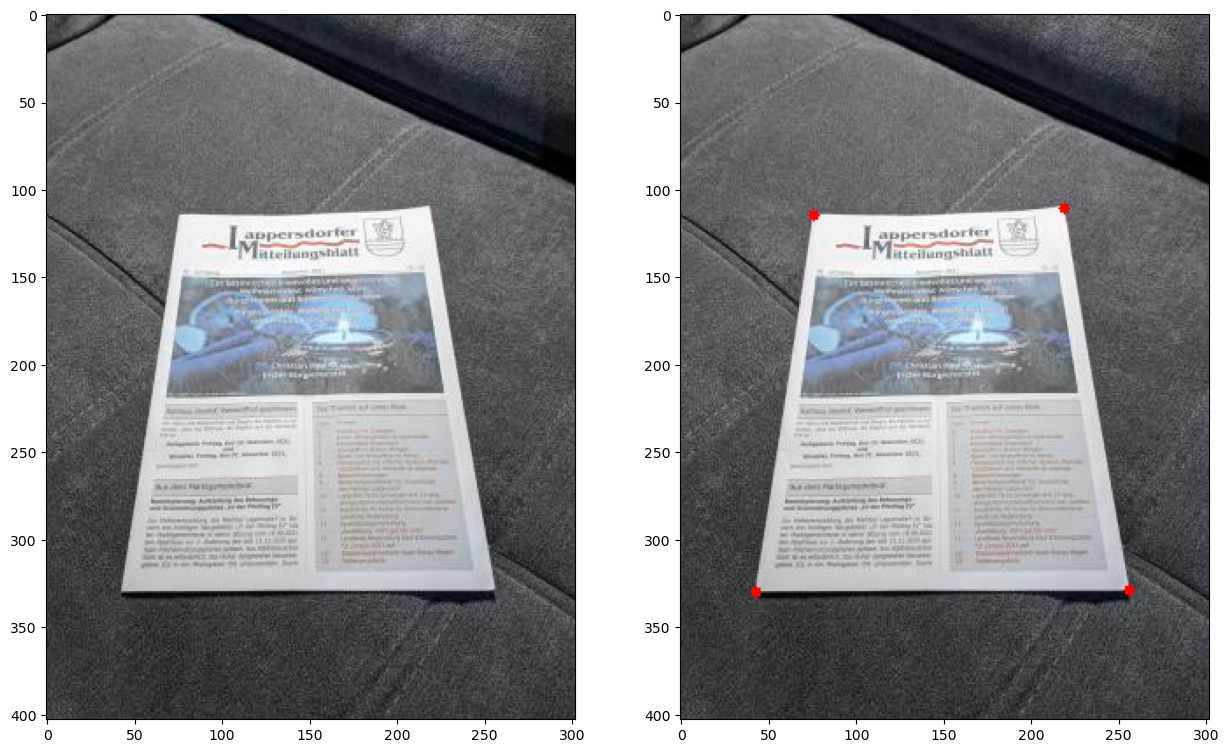

In [14]:
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

In [15]:
src = np.array([
    top_left,
    top_right,
    bottom_left,
    bottom_right
], dtype=np.float32)

dst = np.array([
    [0, 0],
    [cols - 1, 0],
    [0, rows - 1],
    [cols - 1, rows - 1]
], dtype=np.float32)

(<Axes: >, <matplotlib.image.AxesImage at 0x1f85afb5a90>)

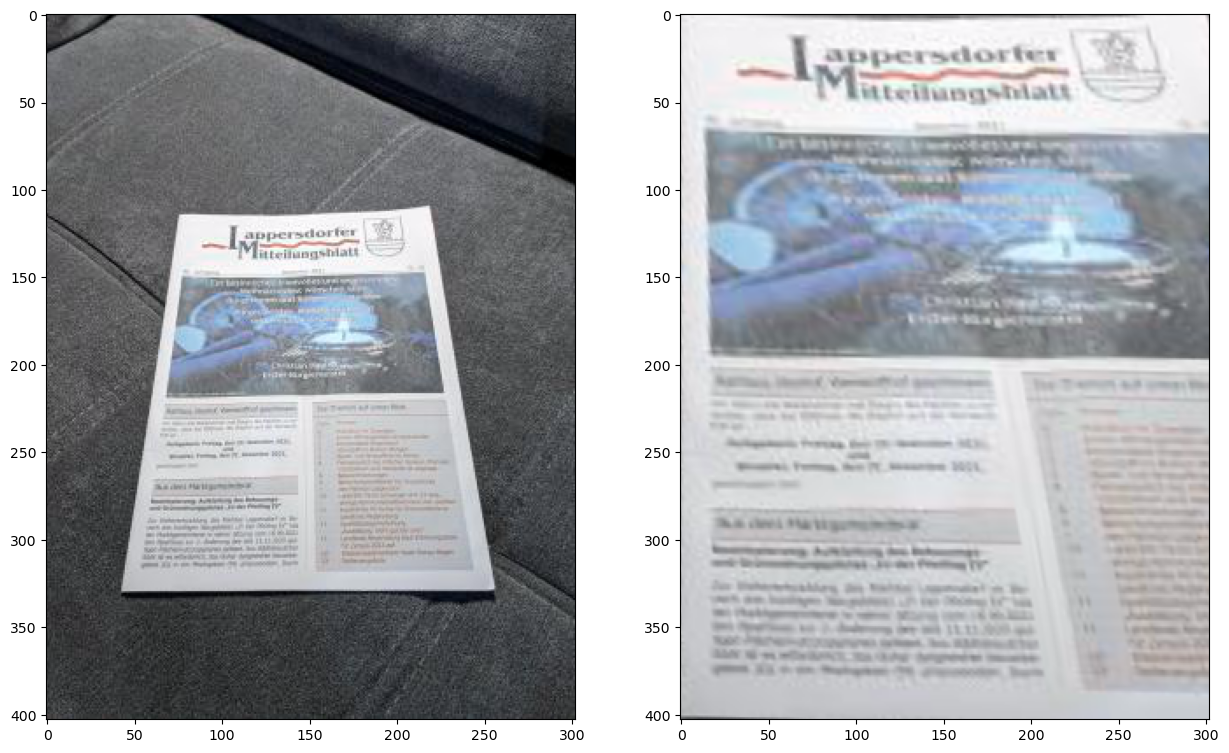

In [16]:
M = cv2.getAffineTransform(src[:3], dst[:3])

rectified = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<Axes: >, <matplotlib.image.AxesImage at 0x1f85b451090>)

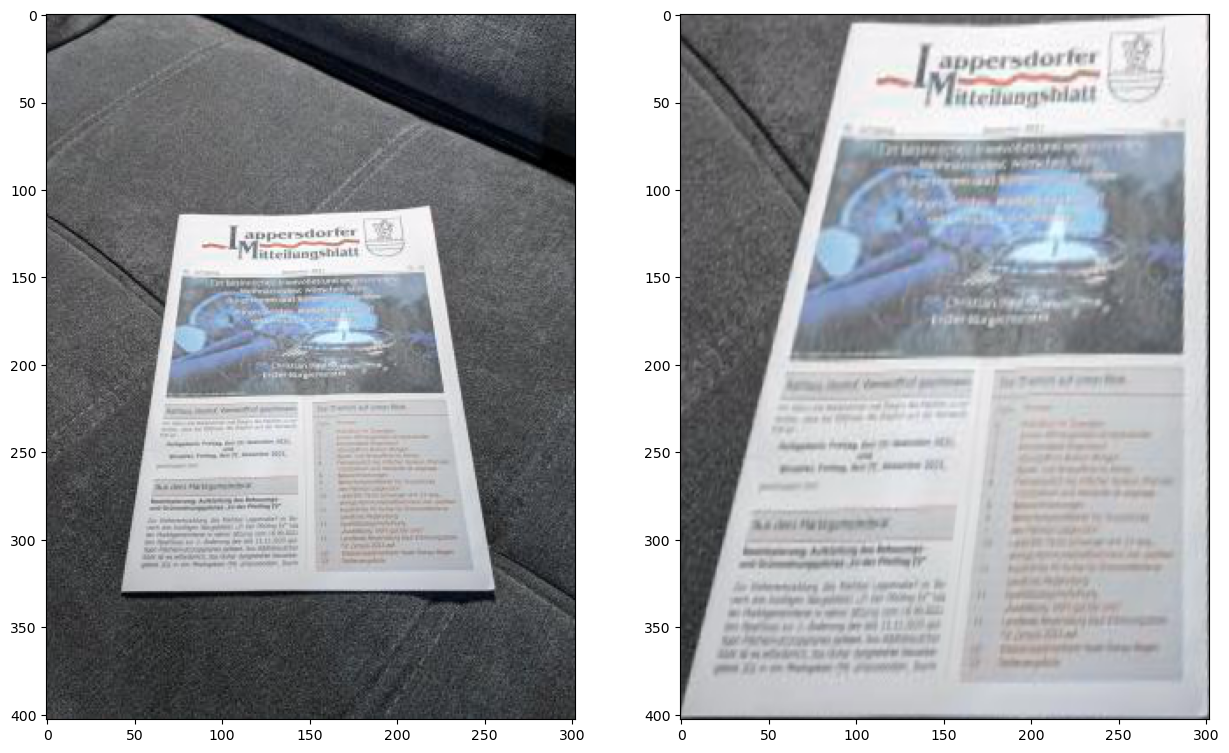

In [17]:
M = cv2.getAffineTransform(src[1:], dst[1:])

rectified = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<Axes: >, <matplotlib.image.AxesImage at 0x1f85b8f0690>)

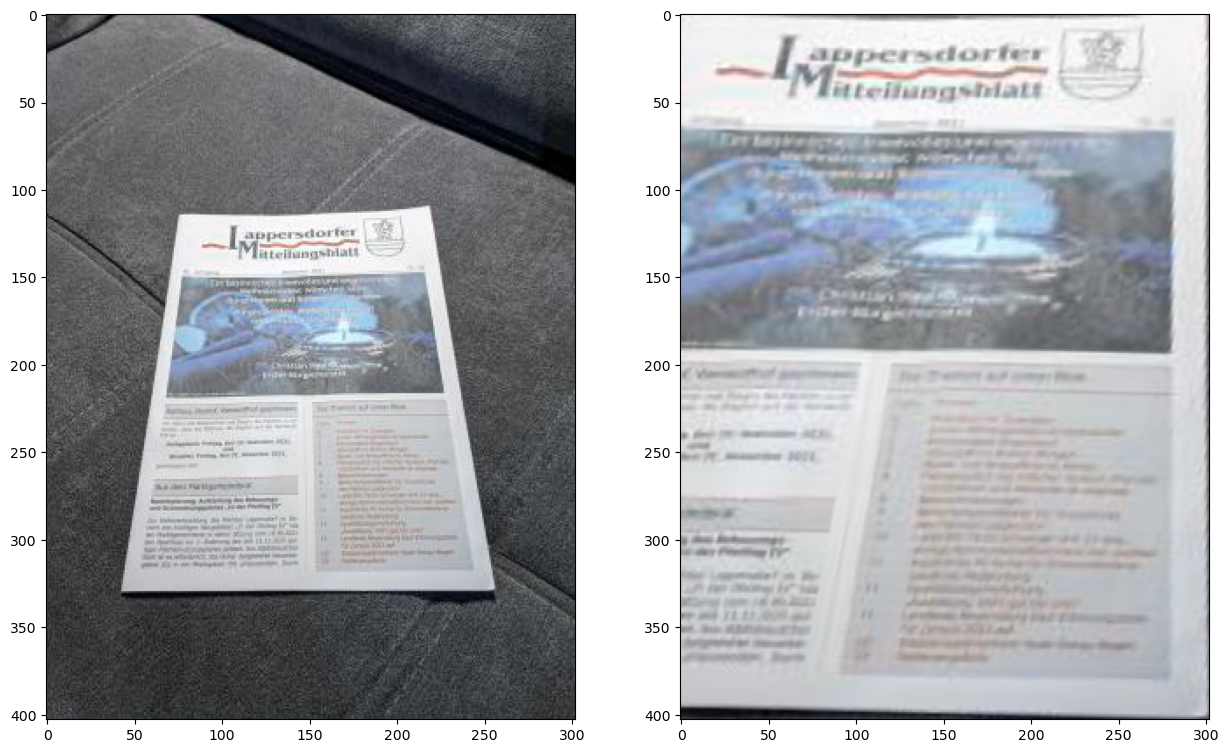

In [18]:
M, inliers = cv2.estimateAffine2D(src, dst)

rectified = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<Axes: >, <matplotlib.image.AxesImage at 0x1f85bd43c50>)

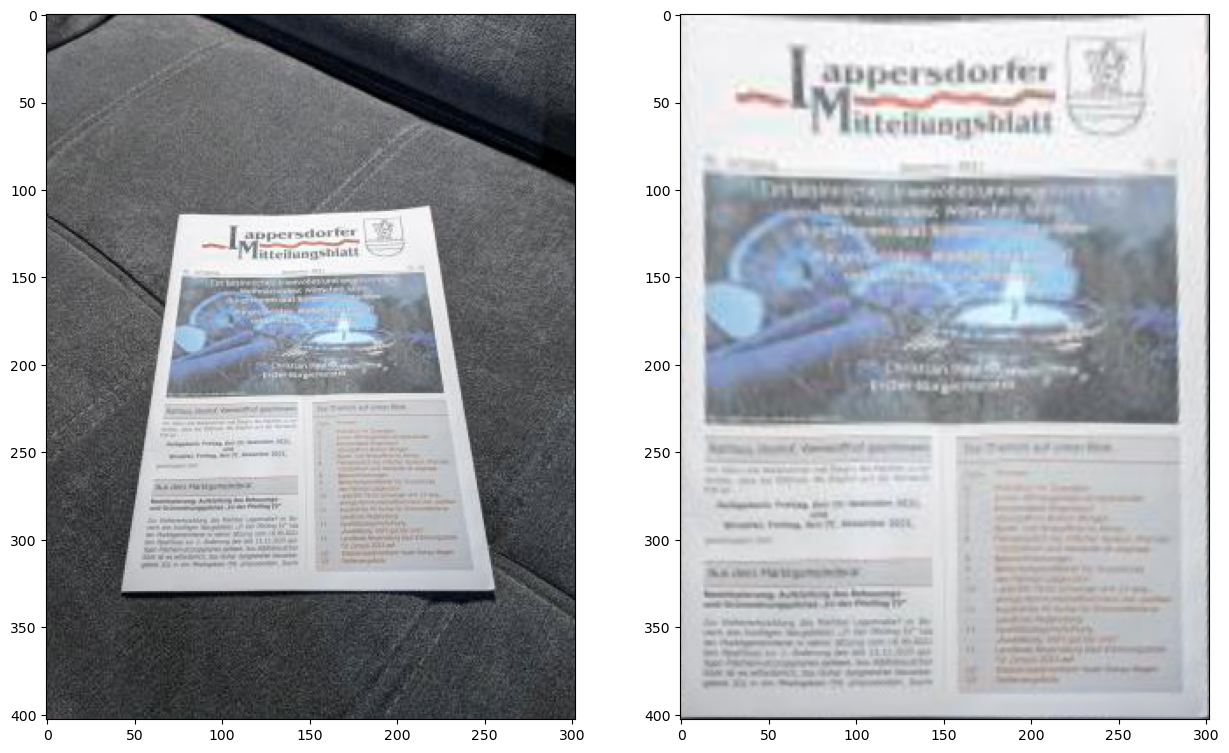

In [19]:
M = cv2.getPerspectiveTransform(src, dst)

rectified = cv2.warpPerspective(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

In [ ]:
# Аффинное преобразование сохраняет параллельность линий и отношения длин на параллельных прямых.
# Но в данном случае изображение документа имеет перспективное искажение.
# 1 → точка считается корректной (inlier)
# 0 → точка считается выбросом (outlier)
# Если все значения равны 1, это значит все точки согласуются с найденной моделью.
# Но даже при этом аффинное преобразование всё равно не справляется — потому что модель просто не подходит физически, а не потому что есть выбросы.
# Гомография учитывает перспективные искажения и использует 4 точки.
# Как результат документ становится прямоугольным, перспективные искажения исчезают и изображение выглядит значительно лучше.